## Exercise 1: The Cosmic Banana

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# Import GPT2
from transformers import GPT2Model, GPT2Tokenizer

In [2]:
gpt2_tok = GPT2Tokenizer.from_pretrained("gpt2")
print(gpt2_tok.vocab_size)
gpt2 = GPT2Model.from_pretrained("gpt2")
print(gpt2)

50257
GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D(nf=2304, nx=768)
        (c_proj): Conv1D(nf=768, nx=768)
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D(nf=3072, nx=768)
        (c_proj): Conv1D(nf=768, nx=3072)
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)


In [3]:
embeddings = gpt2.wte.weight.detach().numpy()
embeddings.shape

(50257, 768)

In [4]:
banana_toks = gpt2_tok.encode("banana")
apple_toks  = gpt2_tok.encode("apple")
cosmic_toks = gpt2_tok.encode("cosmic")

print(f"'banana' compries {len(banana_toks)} tokens:\n{[gpt2_tok.decode([i]) for i in banana_toks]}")
print(f"\n'apple' compries {len(apple_toks)} tokens:\n{[gpt2_tok.decode([i]) for i in apple_toks]}")
print(f"\n'cosmic' compries {len(cosmic_toks)} tokens:\n{[gpt2_tok.decode([i]) for i in cosmic_toks]}")

'banana' compries 2 tokens:
['ban', 'ana']

'apple' compries 1 tokens:
['apple']

'cosmic' compries 2 tokens:
['cos', 'mic']


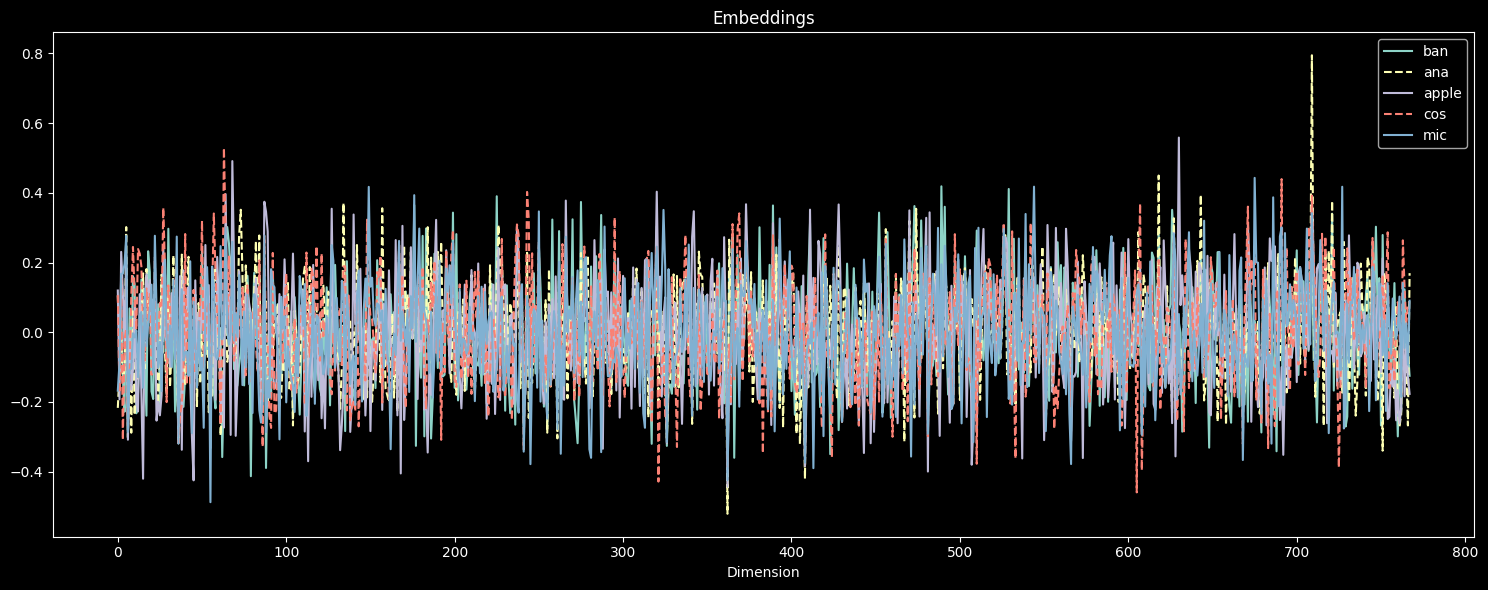

In [5]:
plt.figure(figsize=(15,6))

plt.plot(embeddings[banana_toks[0]],label=gpt2_tok.decode(banana_toks[0]))
plt.plot(embeddings[banana_toks[1]],"--",label=gpt2_tok.decode(banana_toks[1]))
plt.plot(embeddings[apple_toks[0]],label=gpt2_tok.decode(apple_toks[0]))
plt.plot(embeddings[cosmic_toks[0]],"--",label=gpt2_tok.decode(cosmic_toks[0]))
plt.plot(embeddings[cosmic_toks[1]],label=gpt2_tok.decode(cosmic_toks[1]))

plt.gca().set(title="Embeddings",xlabel="Dimension")
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
gpt2_tok.encode("ine")

[500]

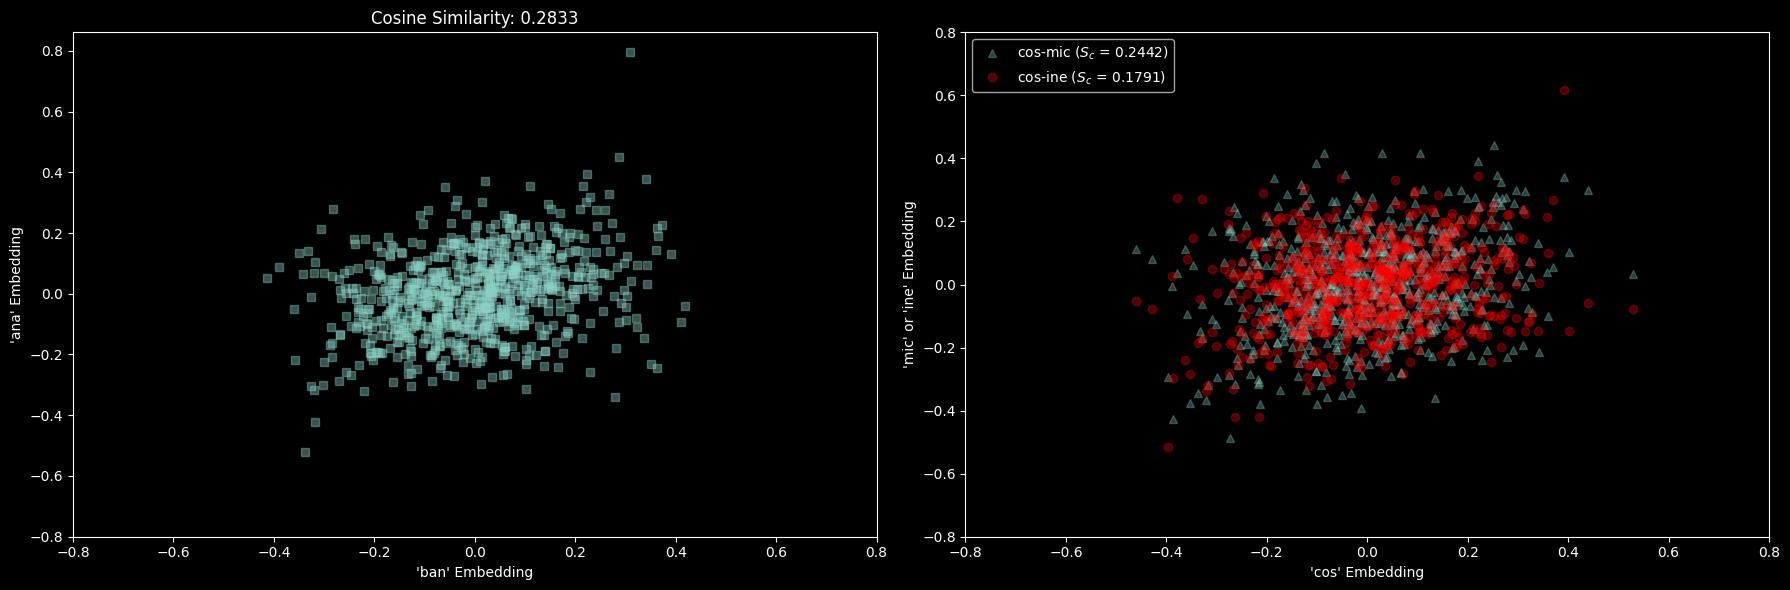

In [7]:
ban_ana_cosSim = sum(embeddings[banana_toks[0]]*embeddings[banana_toks[1]]) / ( np.sqrt(sum(embeddings[banana_toks[0]]**2))*np.sqrt(sum(embeddings[banana_toks[1]]**2)) )
cos_mic_cosSim = sum(embeddings[cosmic_toks[0]]*embeddings[cosmic_toks[1]]) / ( np.sqrt(sum(embeddings[cosmic_toks[0]]**2))*np.sqrt(sum(embeddings[cosmic_toks[1]]**2)) )
cos_ine_cosSim = sum(embeddings[cosmic_toks[0]]*embeddings[gpt2_tok.encode("ine")[0]]) / ( np.sqrt(sum(embeddings[cosmic_toks[0]]**2))*np.sqrt(sum(embeddings[gpt2_tok.encode("ine")[0]]**2)) ) 

_,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(embeddings[banana_toks[0]],embeddings[banana_toks[1]],"s",alpha=.4)
ax[0].set(xticks=np.arange(-.8,.9,.2),yticks=np.arange(-.8,.9,.2))
ax[0].set(xlabel=f"'{gpt2_tok.decode([banana_toks[0]])}' Embedding",ylabel=f"'{gpt2_tok.decode([banana_toks[1]])}' Embedding",
          title=f"Cosine Similarity: {ban_ana_cosSim:.4f}")

ax[1].plot(embeddings[cosmic_toks[0]],embeddings[cosmic_toks[1]],"^",alpha=.3,label=f"cos-mic ($S_c$ = {cos_mic_cosSim:.4f})")
ax[1].plot(embeddings[cosmic_toks[0]],embeddings[gpt2_tok.encode("ine")[0]],"or",alpha=.3,label=f"cos-ine ($S_c$ = {cos_ine_cosSim:.4f})")
ax[1].set(xticks=np.arange(-.8,.9,.2),yticks=np.arange(-.8,.9,.2))
ax[1].set(xlabel=f"'{gpt2_tok.decode([cosmic_toks[0]])}' Embedding",ylabel=f"'{gpt2_tok.decode([cosmic_toks[1]])}' or 'ine' Embedding")
ax[1].legend()

plt.tight_layout()
plt.show()

## Exercise 2: Find Tokens With Similar Embeddings

In [8]:
target_word = "Rand"
tokens = gpt2_tok.encode(target_word)
print(f"Tokens: {tokens}")
print(f"Total tokens in GPT2 tokenizer: {gpt2_tok.vocab_size}")

Tokens: [38918]
Total tokens in GPT2 tokenizer: 50257


In [9]:
target_emb = embeddings[tokens[0]]

cos_similarities = np.zeros(gpt2_tok.vocab_size)

for t in range(gpt2_tok.vocab_size):
    
    t_emb = embeddings[t]
    cos_Sim = sum(target_emb*t_emb) / ( np.sqrt(sum(target_emb**2))*np.sqrt(sum(t_emb**2)) )

    cos_similarities[t] = cos_Sim

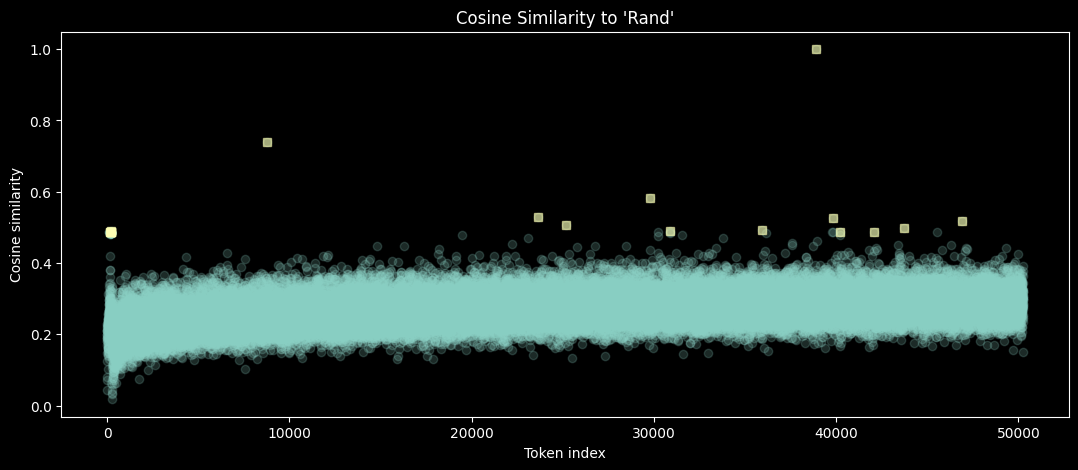

In [10]:
best20 = np.argsort(cos_similarities)[::-1][:20]

plt.figure(figsize=(13,5))

plt.plot(cos_similarities,"o",alpha=.2)
plt.plot(best20,cos_similarities[best20],"s",alpha=.6)
plt.gca().set(title=f"Cosine Similarity to '{target_word}'",xlabel="Token index",ylabel="Cosine similarity")

plt.show()

In [11]:
for i in best20:
    print(f"'{gpt2_tok.decode([i])}' with cosine similarity {cos_similarities[i]:.3f}")

'Rand' with cosine similarity 1.000
' Rand' with cosine similarity 0.741
' Randall' with cosine similarity 0.582
'Ron' with cosine similarity 0.528
' Randolph' with cosine similarity 0.526
' RAND' with cosine similarity 0.518
'rand' with cosine similarity 0.506
' rand' with cosine similarity 0.498
' libertarians' with cosine similarity 0.493
'' with cosine similarity 0.490
'embedreportprint' with cosine similarity 0.489
'' with cosine similarity 0.488
'' with cosine similarity 0.488
'' with cosine similarity 0.488
'�' with cosine similarity 0.488
' TheNitrome' with cosine similarity 0.488
'�' with cosine similarity 0.488
'' with cosine similarity 0.488
'' with cosine similarity 0.487
'InstoreAndOnline' with cosine similarity 0.487


## Exercise 3: One-to-all Cosine Similarity via Linear Algebra

In [19]:
# I got some help in this exercise

# normalize entire embedding matrix (in a new variable!)
Enorm = embeddings / np.linalg.norm(embeddings,axis=1,keepdims=True)

# cosine similarity matrices
cossims2 = Enorm[tokens] @ Enorm.T
cossims2 = cossims2.squeeze()

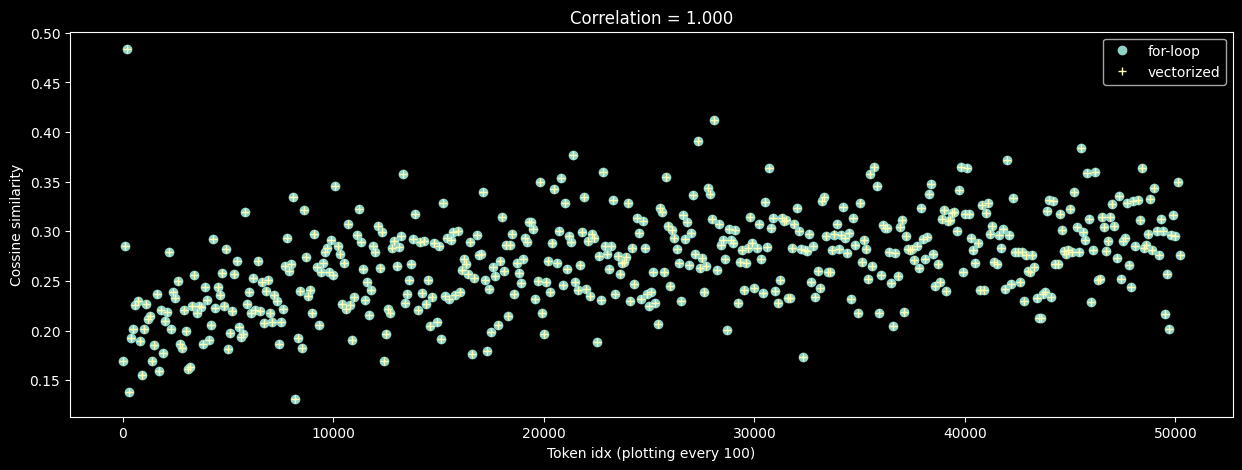

In [20]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(cos_similarities),100),cos_similarities[::100],'o',label='for-loop')
plt.plot(range(0,len(cossims2),100),cossims2[::100],'+',label='vectorized')

plt.legend()
plt.gca().set(xlabel='Token idx (plotting every 100)',ylabel='Cossine similarity',title=f'Correlation = {np.corrcoef(cos_similarities,cossims2)[0,1]:.3f}')
plt.show()